In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from dateutil.parser import parse
import matplotlib.pyplot as plt

In [ ]:

duration_url="https://www.imdb.com/search/title/?genres=western&genres=Adventure&explore=title_type,genres&ref_=adv_explore_rhs"

# request url
page = requests.get(url=duration_url)

# create a BeautifulSoup object
soup = BeautifulSoup(page.content, 'html.parser')

#page title -- WORKS
title = soup.find('title')
display(title.string)
# data['title'] = title.string


#get rating -- WORKS
ratings_container = soup.find_all(class_='lister-item-content')
ratings = []
for movie in ratings_container:
    rating_div = movie.find(class_="inline-block ratings-imdb-rating")
    if rating_div !=None:
        rating = rating_div.attrs.get("data-value")
        ratings.append(rating)
    else:
        ratings.append("NaN")



#get genre --WORKS
genre_container = soup.find_all(class_='genre')
gr = [title.get_text() for title in genre_container]
gr = [title.split('\n') for title in gr]
genre = [title[1] for title in gr]

#Description
#description_container = soup.find(class_='text-muted')
#desc = [title.get_text() for title in description_container]
#desc = [title.split('\n') for title in desc]
#display(desc)
#description = [title[3] for title in desc]
#display(description)


#get titles -- WORKS
titles_container = soup.find_all(class_= "lister-item-header")
titles = [title.get_text() for title in titles_container ] #loop to getText in days_container
titles = [title.split('\n') for title in titles] #split by \n
chart_number = [title[1] for title in titles] #split by \n
titles_names = [title[2] for title in titles] #split by \n




#Actors & Directors -- WORKS
movie_list = soup.find_all(class_="lister-item-content")
actor_links_by_movie = [movie.select('a[href*="/name"]') for movie in movie_list]
actor_names_by_movie = [[href_link.get_text() for href_link in movie_list] for movie_list in actor_links_by_movie]
directors =[] ## This one for PD
actors =[] ## This one for pd
for movie in actor_names_by_movie:
    if len(movie)>0:
        directors.append(movie[0])
        actors.append(", ".join(movie[1:]))
    else:
        directors.append("NaN")
        actors.append("NaN")



####### duration ########
dur_movies = soup.find_all(class_='lister-item-content')
movie_durs =[] ###this one
#print(len(dur_movies))
for movie in dur_movies:

    duration_span = movie.find(class_="runtime")
    if duration_span != None:
        get_text = duration_span.get_text()
        get_int_text = "".join([i for i in get_text if i.isnumeric()])
        movie_durs.append(get_int_text)
    else:
        movie_durs.append("NaN")





#filming date -- WORKS
filming_container = soup.find_all(class_='lister-item-year text-muted unbold')
filming = [title.get_text() for title in filming_container]
filming = [title.split('\n') for title in filming]
filming_date = [title[0] for title in filming]





'Top 50 Western, Adventure Movies and TV Shows - IMDb'

In [3]:
df = pd.DataFrame({'Chart Number': chart_number,
                    'Title': titles_names,
                    'Release Date': filming_date,
                    'Duration(min)': movie_durs,
                    'Genre': genre,
                    'Rating': ratings,
                    'Director': directors,
                    'Actors': actors})

df

NameError: name 'chart_number' is not defined

In [4]:
# get all the div tags use find_all
#soup.find_all('div')
# to get a tag with class value
#soup.find("div",{'class':'titleBar'})

In [5]:
#pages = [str(i) for i in range(1,5)]
#years_url = [str(i) for i in range(2000,2018)]

In [6]:

freq = df.groupby('Release Date').count()
freq

NameError: name 'df' is not defined

In [ ]:
""" 
get page data takes an IMDB chart url and pulls the data into a list
"""

def get_page_data(input_url):
    # request url
    page = requests.get(url=input_url)

    # create a BeautifulSoup object
    soup = BeautifulSoup(page.content, 'html.parser')

    #page title -- WORKS
    title = soup.find('title')
    display(title.string)
    # data['title'] = title.string


    #get rating -- WORKS
    ratings_container = soup.find_all(class_='lister-item-content')
    ratings = []
    for movie in ratings_container:
        rating_div = movie.find(class_="inline-block ratings-imdb-rating")
        if rating_div !=None:
            rating = rating_div.attrs.get("data-value")
            ratings.append(rating)
        else:
            ratings.append("NaN")


    #release-date 


    # Get genre --WORKS
    genre_container = soup.find_all(class_='genre')
    gr = [title.get_text() for title in genre_container]
    gr = [title.split('\n') for title in gr]
    genre = [title[1] for title in gr]

    # Get titles -- WORKS
    titles_container = soup.find_all(class_= "lister-item-header")
    titles = [title.get_text() for title in titles_container ] #loop to getText in days_container
    titles = [title.split('\n') for title in titles] #split by \n
    chart_number = [title[1] for title in titles] #split by \n
    titles_names = [title[2] for title in titles] #split by \n
    int_chart_number = [int("".join([i for i in movie if i.isnumeric()])) for movie in chart_number]
 
    # Get Actors & Directors -- WORKS
    movie_list = soup.find_all(class_="lister-item-content")
    actor_links_by_movie = [movie.select('a[href*="/name"]') for movie in movie_list]
    actor_names_by_movie = [[href_link.get_text() for href_link in movie_list] for movie_list in actor_links_by_movie]
    directors =[] ## This one for PD
    actors =[] ## This one for pd
    for movie in actor_names_by_movie:
        if len(movie)>0:
            directors.append(movie[0])
            actors.append(", ".join(movie[1:]))
        else:
            directors.append("NaN")
            actors.append("NaN")

    # Get Duration -- WORKS
    dur_movies = soup.find_all(class_='lister-item-content')
    movie_durs =[] 
    for movie in dur_movies:
        duration_span = movie.find(class_="runtime")
        if duration_span != None:
            get_text = duration_span.get_text()
            get_int_text = "".join([i for i in get_text if i.isnumeric()])
            movie_durs.append(int(get_int_text))
        else:
            movie_durs.append("NaN")


    # Filming date -- WORKS
    film_release = soup.find_all(class_='lister-item-content')
    release_year =  []
    for movie in film_release:
        year_div = movie.find(class_='lister-item-year text-muted unbold')
        if year_div != None and len(year_div.get_text()) > 4:
            get_ints = [i for i in year_div.get_text() if i.isnumeric()]
            #print(get_ints)
            year = "".join(get_ints[0:4])
            release_year.append(year)
        else:
            release_year.append("NaN")
  


    data_dict = {'Chart Number': chart_number,
                    'Title': titles_names,
                    'Release Date': filming_date,
                    'Duration(min)': movie_durs,
                    'Genre': genre,
                    'Rating': ratings,
                    'Director': directors,
                    'Actors': actors}

    return [int_chart_number,titles_names, release_year, movie_durs, genre, ratings,directors,actors]

## returns the lists of data for the first 50
first_50 = get_page_data("https://www.imdb.com/search/title/?genres=western&genres=Adventure&explore=title_type,genres&ref_=adv_explore_rhs")
## returns the lists of data for the second 50
second_50 = get_page_data("https://www.imdb.com/search/title/?genres=western,adventure&start=51&explore=title_type,genres&ref_=adv_nxt")

# Combines them both into a dictionary containing all 100
data_dict = {'Chart Number': first_50[0]+second_50[0],
                    'Title': first_50[1]+second_50[1],
                    'Release Date': first_50[2]+second_50[2],
                    'Duration(min)': first_50[3]+second_50[3],
                    'Genre': first_50[4]+second_50[4],
                    'Rating': first_50[5]+second_50[5],
                    'Director': first_50[6]+second_50[6],
                    'Actors': first_50[7]+second_50[7]}

# creates dataframe from the dictionary
df = pd.DataFrame(data_dict)

display(df)

'Top 50 Western, Adventure Movies and TV Shows - IMDb'

'Western, Adventure\n(Sorted by Popularity Ascending) - IMDb'

,Chart Number,Title,Release Date,Duration(min),Genre,Rating,Director,Actors
0,1,News of the World,2020,118,"Action, Adventure, Drama",6.8,Paul Greengrass,"Tom Hanks, Helena Zengel, Tom Astor, Travis Jo..."
1,2,Dances with Wolves,1990,181,"Adventure, Drama, Western",8,Kevin Costner,"Kevin Costner, Mary McDonnell, Graham Greene, ..."
2,3,The Magnificent Seven,2016,132,"Action, Adventure, Western",6.9,Antoine Fuqua,"Denzel Washington, Chris Pratt, Ethan Hawke, V..."
3,4,The Searchers,1956,119,"Adventure, Drama, Western",7.9,John Ford,"John Wayne, Jeffrey Hunter, Vera Miles, Ward Bond"
4,5,The Revenant,2015,156,"Action, Adventure, Drama",8,Alejandro G. Iñárritu,"Leonardo DiCaprio, Tom Hardy, Will Poulter, Do..."
...,...,...,...,...,...,...,...,...
95,96,Sky King,1951,30,"Adventure, Western",7.7,Kirby Grant,"Gloria Winters, Ewing Mitchell, Ron Hagerthy"
96,97,The Undefeated,1969,119,"Action, Adventure, Romance",6.7,Andrew V. McLaglen,"John Wayne, Rock Hudson, Antonio Aguilar, Roma..."
97,98,Zorro,1975,120,"Action, Adventure, Comedy",6.5,Duccio Tessari,"Alain Delon, Stanley Baker, Ottavia Piccolo, M..."
98,99,Death Hunt,1981,97,"Action, Adventure, Crime",7,Peter R. Hunt,"Charles Bronson, Lee Marvin, Andrew Stevens, C..."


In [ ]:
display(df.sort_values(by=['Release Date']))

,Chart Number,Title,Release Date,Duration(min),Genre,Rating,Director,Actors
71,72,The Gold Rush,1925,95,"Adventure, Comedy, Drama",8.2,Charles Chaplin,"Charles Chaplin, Mack Swain, Tom Murray, Henry..."
21,22,Stagecoach,1939,96,"Adventure, Drama, Western",7.8,John Ford,"John Wayne, Claire Trevor, Andy Devine, John C..."
82,83,Fort Apache,1948,128,"Action, Adventure, Western",7.5,John Ford,"John Wayne, Henry Fonda, Shirley Temple, Pedro..."
46,47,The Treasure of the Sierra Madre,1948,126,"Adventure, Drama, Western",8.2,John Huston,"Humphrey Bogart, Walter Huston, Tim Holt, Bruc..."
33,34,Red River,1948,133,"Action, Adventure, Drama",7.8,Howard Hawks,"Arthur Rosson, John Wayne, Montgomery Clift, J..."
...,...,...,...,...,...,...,...,...
0,1,News of the World,2020,118,"Action, Adventure, Drama",6.8,Paul Greengrass,"Tom Hanks, Helena Zengel, Tom Astor, Travis Jo..."
6,7,Spirit Untamed,2021,NaN,"Animation, Adventure, Family",NaN,Elaine Bogan,"Ennio Torresan, Eiza González, Isabela Merced,..."
48,49,Tyger Tyger,2021,92,"Adventure, Romance, Western",5.1,Kerry Mondragon,"Sam Quartin, Dylan Sprouse, Nekhebet Kum Juch,..."
34,35,Django/Zorro,2022,NaN,"Adventure, Drama, Western",NaN,NaN,NaN


<BarContainer object of 100 artists>

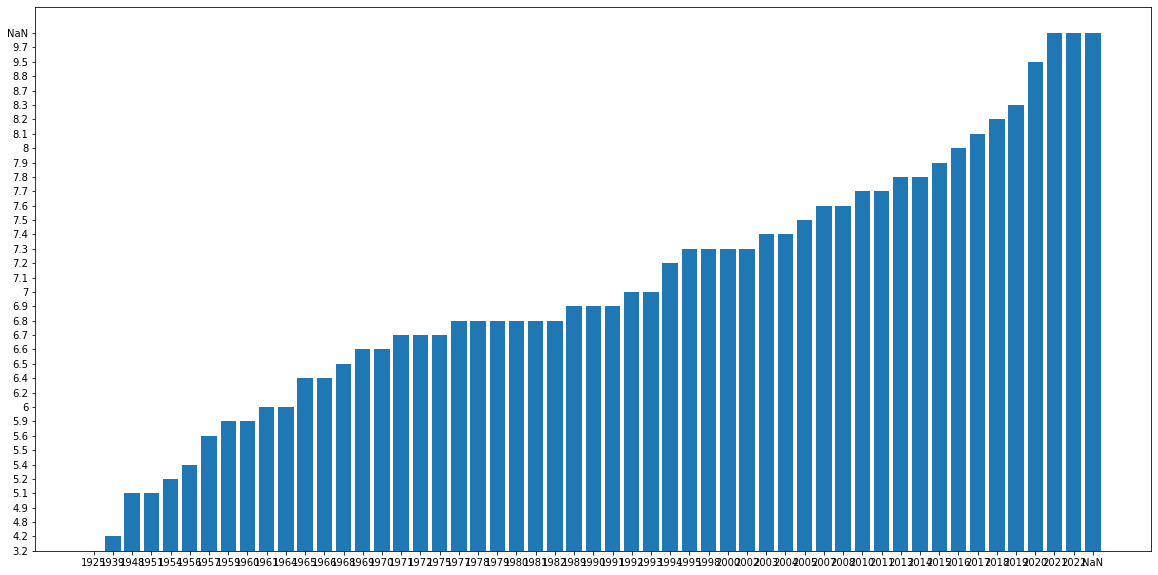

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(sorted(df['Release Date']), sorted(df['Rating']))


In [ ]:

freq = df.groupby('Release Date').count()
freq

,Chart Number,Title,Duration(min),Genre,Rating,Director,Actors
Release Date,,,,,,,
1925,1,1,1,1,1,1,1
1939,1,1,1,1,1,1,1
1948,3,3,3,3,3,3,3
1951,1,1,1,1,1,1,1
1954,1,1,1,1,1,1,1
1956,1,1,1,1,1,1,1
1957,3,3,3,3,3,3,3
1959,1,1,1,1,1,1,1
1960,2,2,2,2,2,2,2


In [ ]:
rds = []

for i in range(len(df.index)):
     #print(df['Duration(min)'][i])
    if df['Duration(min)'][i] != 'NaN' and df['Rating'][i] != 'NaN':
        rds.append(float(df['Rating'][i]) / int(df['Duration(min)'][i]))
    else:
        rds.append('NaN')

rds



[0.0576271186440678,
 0.04419889502762431,
 0.052272727272727276,
 0.06638655462184874,
 0.05128205128205128,
 0.06015625,
 'NaN',
 0.06728971962616823,
 0.12790697674418605,
 0.04266666666666667,
 'NaN',
 0.05851851851851852,
 0.06271186440677966,
 0.05894736842105263,
 0.031050228310502283,
 0.04,
 0.04926470588235294,
 0.04033613445378151,
 0.035078534031413616,
 0.08674698795180723,
 0.162,
 0.08125,
 0.02265625,
 0.04473684210526316,
 0.06538461538461539,
 0.05798319327731093,
 0.05590551181102362,
 0.06,
 0.04714285714285714,
 0.056488549618320616,
 0.00660828025477707,
 0.0578125,
 0.07037037037037036,
 0.058646616541353384,
 'NaN',
 0.046511627906976744,
 0.04744525547445255,
 0.045625,
 0.04916666666666667,
 0.12833333333333333,
 0.07156862745098039,
 0.06280991735537189,
 0.062393162393162394,
 0.05964912280701754,
 0.05522388059701493,
 0.05467625899280575,
 0.06507936507936507,
 0.04926470588235294,
 0.05543478260869565,
 0.08214285714285714,
 0.01467391304347826,
 0.123333

In [ ]:
df['Rarings/Duration'] = rds

df

,Chart Number,Title,Release Date,Duration(min),Genre,Rating,Director,Actors,Rarings/Duration
0,1,News of the World,2020,118,"Action, Adventure, Drama",6.8,Paul Greengrass,"Tom Hanks, Helena Zengel, Tom Astor, Travis Jo...",0.057627
1,2,Dances with Wolves,1990,181,"Adventure, Drama, Western",8,Kevin Costner,"Kevin Costner, Mary McDonnell, Graham Greene, ...",0.044199
2,3,The Magnificent Seven,2016,132,"Action, Adventure, Western",6.9,Antoine Fuqua,"Denzel Washington, Chris Pratt, Ethan Hawke, V...",0.052273
3,4,The Searchers,1956,119,"Adventure, Drama, Western",7.9,John Ford,"John Wayne, Jeffrey Hunter, Vera Miles, Ward Bond",0.066387
4,5,The Revenant,2015,156,"Action, Adventure, Drama",8,Alejandro G. Iñárritu,"Leonardo DiCaprio, Tom Hardy, Will Poulter, Do...",0.051282
...,...,...,...,...,...,...,...,...,...
95,96,Sky King,1951,30,"Adventure, Western",7.7,Kirby Grant,"Gloria Winters, Ewing Mitchell, Ron Hagerthy",0.256667
96,97,The Undefeated,1969,119,"Action, Adventure, Romance",6.7,Andrew V. McLaglen,"John Wayne, Rock Hudson, Antonio Aguilar, Roma...",0.056303
97,98,Zorro,1975,120,"Action, Adventure, Comedy",6.5,Duccio Tessari,"Alain Delon, Stanley Baker, Ottavia Piccolo, M...",0.054167
98,99,Death Hunt,1981,97,"Action, Adventure, Crime",7,Peter R. Hunt,"Charles Bronson, Lee Marvin, Andrew Stevens, C...",0.072165


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e9d1d08e-1cce-4c6d-9dd2-e7a832ea09a1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>